In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import urllib as url
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Part A: Simple Linear Regression Analysis and Modelling

In [2]:
df=pd.read_csv('homeprices.csv')

In [3]:
df.shape

(5, 2)

In [4]:
df.columns

Index(['area', 'price'], dtype='object')

In [5]:
df.describe()

,area,price
count,5.000000,5.000000
mean,3280.000000,626000.000000
std,540.370243,74949.983322
min,2600.000000,550000.000000
25%,3000.000000,565000.000000
50%,3200.000000,610000.000000
75%,3600.000000,680000.000000
max,4000.000000,725000.000000


In [6]:
df.mean()

area       3280.0
price    626000.0
dtype: float64

In [7]:
type(df.area)

pandas.core.series.Series

In [8]:
x=df.area

In [9]:
y=df.price

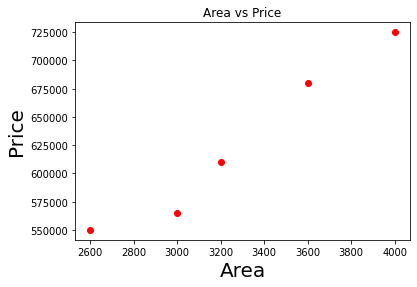

In [10]:
plt.scatter(x, y, color = 'red')
plt.title('Area vs Price')
plt.xlabel('Area', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [12]:
x=pd.DataFrame(x)
y=pd.DataFrame(y)
regressor.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
m=regressor.coef_
m

array([[135.78767123]])

In [14]:
c=regressor.intercept_
c

array([180616.43835616])

In [15]:
regressor.predict([[100000]])

array([[13759383.56164384]])

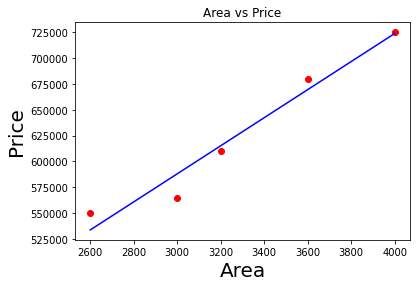

In [16]:
plt.scatter(x, y, color = 'red')
plt.plot(df.area,regressor.predict(df[["area"]]),color='blue')
plt.title('Area vs Price')
plt.xlabel('Area', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.show()

Part D: Multiclass Regression Analysis and Modeling

In [17]:
#importing dataset from sci-kit learn
from sklearn.datasets import load_digits

In [18]:
#Defining the dataset
digit=load_digits()

In [19]:
type(digit)

sklearn.utils.Bunch

In [20]:
#Observing key value pair
digit.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [21]:
print(digit.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [22]:
digit.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [23]:
digit.target

array([0, 1, 2, ..., 8, 9, 8])

In [24]:
digit.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

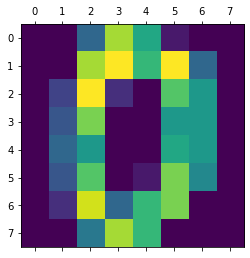

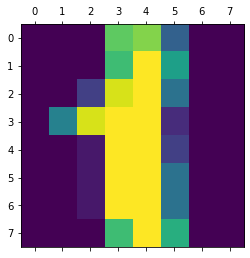

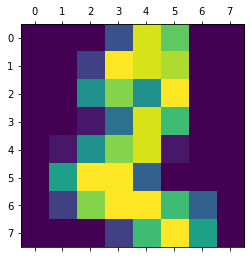

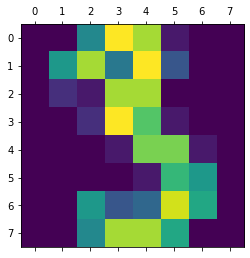

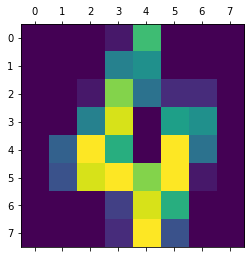

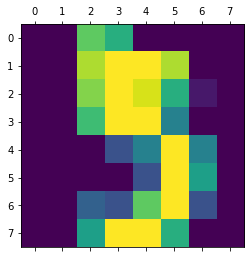

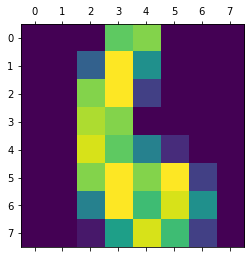

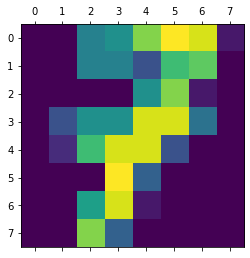

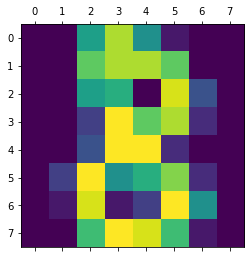

In [25]:
#Graphical result
for i in range (9):
 plt.matshow(digit.images[i])

In [26]:
#Importing 'train_test_split' from sci-kit learn
from sklearn.model_selection import train_test_split

In [27]:
#Splitting matrix for train and test data
X_train,X_test,y_train,y_test=train_test_split(digit.data,digit.target,test_size=0.2,random_state=0)

In [28]:
#Viewing matrix of X_train
X_train.shape

(1437, 64)

In [29]:
#Viewing matrix of X_test
X_test.shape

(360, 64)

In [30]:
#Importing LogisticRegression function from sci-kit learn
from sklearn.linear_model import LogisticRegression

In [31]:
model=LogisticRegression()

In [32]:
#Training the model
%%time
model.fit(X_train,y_train)

CPU times: user 332 ms, sys: 224 ms, total: 556 ms
Wall time: 322 ms


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
#Predicting the model
%%time
ypred=model.predict(X_test)

CPU times: user 1.1 ms, sys: 19 µs, total: 1.12 ms
Wall time: 892 µs


In [34]:
#Importing confusion_matrix from sci-kit learn
from sklearn.metrics import confusion_matrix

In [35]:
#Evaluating the matrix
confusion_matrix(y_test,ypred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]])

In [36]:
#Checking the performance
model.score(X_test,y_test)

0.9666666666666667